## 1.Introduction

Welcome to this notebook, which focuses on analyzing the tradeoff associated with investing in mutual funds while considering environmental, social, and governance (ESG) factors in the investment decision-making process. 

The objective of this project is to provide insights and guidance for making more informed investment choices by incorporating ESG considerations.

Throughout this notebook, we will leverage Python's powerful data manipulation and visualization libraries, such as pandas, matplotlib, numpy, and seaborn, to analyze and visualize the US Mutual Funds dataset.

Let's begin the exploration of mutual fund performance and its relationship with ESG factors!

### 1.1 Notebook Content

* 1 Packages Importation
* 2 
* 3 


## 2.Basic Setup 

### 2.1 Libraries Importation

To ensure the dataset can be effectively used, it is crucial to import the necessary library. By importing the required library, we gain access to specific functions and capabilities that enable us to load, manipulate, and analyze the dataset effectively. 

In [2]:
# Import all necessary libraries  
import pandas as pd #for data manipulation and analysis
import matplotlib.pyplot as plt #for creating plots and visualizations 
import numpy as np # used for numerical computing. It provides efficient arrays and mathematical functions for working with large datasets
import seaborn as sns # is built on top of matplotlib, used for high-level data visualization 
import warnings 
#import xarray as xr # used for working with labeled multi-dimensional arrays


### 2.2 openpyxl library Installation
Installing the openpyxl library is essential for working with datasets in Excel file format. This library offers functionality for reading and writing Excel files, allowing for seamless integration with Python. To install the openpyxl library, we executed the following command in **the terminal**:

conda install openpyxl

### 2.3 Loading the Dataset

In [3]:
df_mutual_funds= pd.read_csv('~/dataset-yahoo-finance-ETF-MF/MutualFunds.csv', header=0)

In [7]:
# Creating a new dataset with selected columns
df_line_graph= df_mutual_funds[['fund_symbol','fund_long_name','size_type','investment_type', 'fund_return_2000','fund_return_2001','fund_return_2002','fund_return_2003','fund_return_2004','fund_return_2005','fund_return_2006','fund_return_2007','fund_return_2008','fund_return_2009','fund_return_2010','fund_return_2011','fund_return_2012','fund_return_2013','fund_return_2014','fund_return_2015','fund_return_2015','fund_return_2016','fund_return_2017','fund_return_2018','fund_return_2019','fund_return_2020','esg_score','environment_score','social_score','governance_score','morningstar_risk_rating']]

## 3.MF size and Financial Performance trends 

### 3.1 MF size and Return Trends  

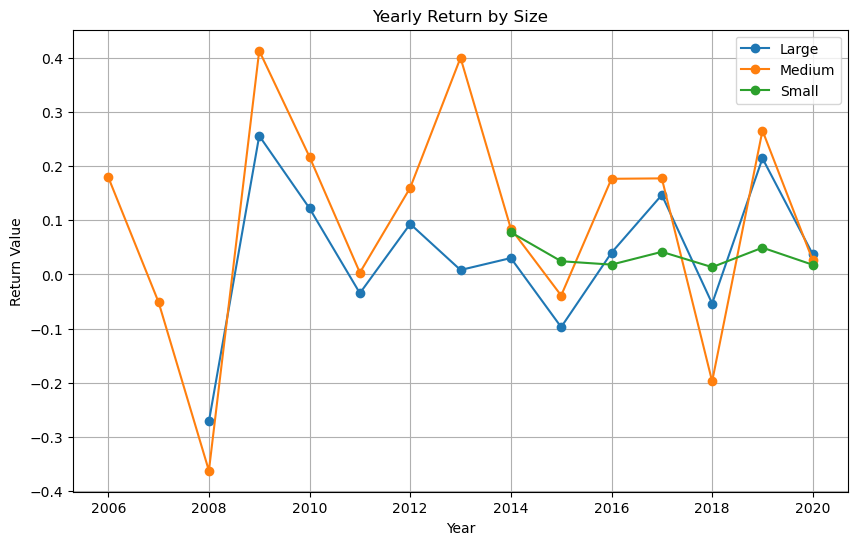

In [6]:

# Group the data by Size
grouped_data = df_mutual_funds.groupby('size_type')

# Plotting
plt.figure(figsize=(10, 6))

for size_type, group in grouped_data:
    # Limit the number of funds to 20,000
    if len(group) > 23782:
        group = group.head(23782)
        
    years = []
    returns = []
    
    for col in group.columns:
        if col.startswith('fund_return_') and not col.endswith('_q1') and not col.endswith('_q2') and not col.endswith('_q3') and not col.endswith('_q4'):
            try:
                year = int(col.split('_')[2])
                years.append(year)
                returns.append(group[col].values[0])
            except (IndexError, ValueError):
                continue
    
    plt.plot(years, returns, marker='o', label=size_type)

plt.xlabel('Year')
plt.ylabel('Return Value')
plt.title('Yearly Return by Size')
plt.legend()
plt.grid(True)

plt.show()


### 3.2 MF size and Alpha (Outperformance : the higher , the better )

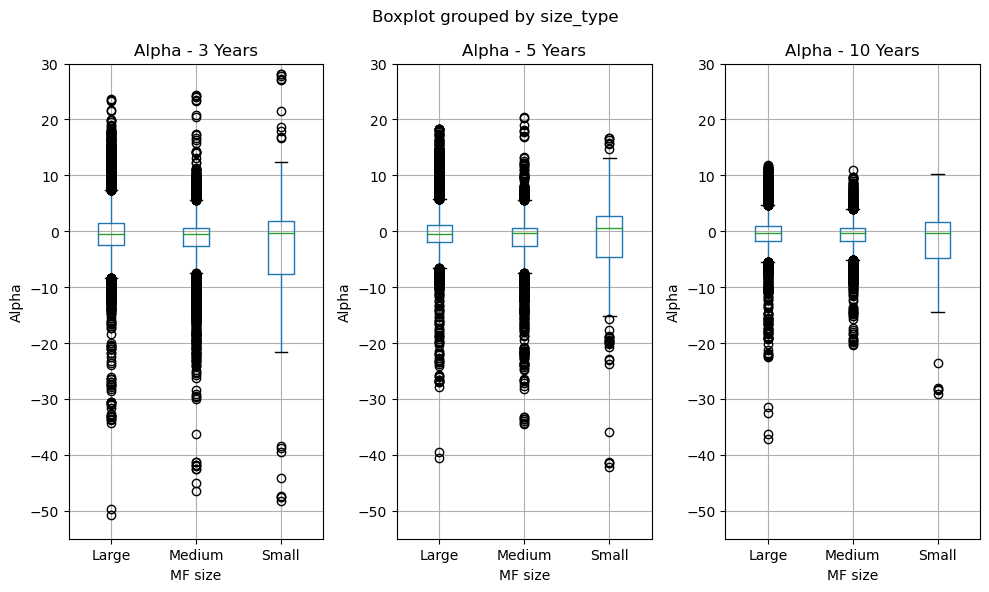

In [7]:

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 6))

# Box plot for fund_alpha_3years
df_mutual_funds.boxplot(column='fund_alpha_3years', by='size_type', ax=axs[0])
axs[0].set_title('Alpha - 3 Years')
axs[0].set_xlabel('MF size')
axs[0].set_ylabel('Alpha')
axs[0].set_ylim(-55, 30)  # Set the y-axis limit for the first subplot

# Box plot for fund_alpha_5years
df_mutual_funds.boxplot(column='fund_alpha_5years', by='size_type', ax=axs[1])
axs[1].set_title('Alpha - 5 Years')
axs[1].set_xlabel('MF size')
axs[1].set_ylabel('Alpha')
axs[1].set_ylim(-55, 30)  # Set the y-axis limit for the first subplot

# Box plot for fund_alpha_10years
df_mutual_funds.boxplot(column='fund_alpha_10years', by='size_type', ax=axs[2])
axs[2].set_title('Alpha - 10 Years')
axs[2].set_xlabel('MF size')
axs[2].set_ylabel('Alpha')
axs[2].set_ylim(-55, 30)  # Set the y-axis limit for the first subplot


# Adjust layout to prevent overlapping titles
plt.tight_layout()

plt.show()


### 3.3 MF size and Beta (Market Risk : the lower , the better)

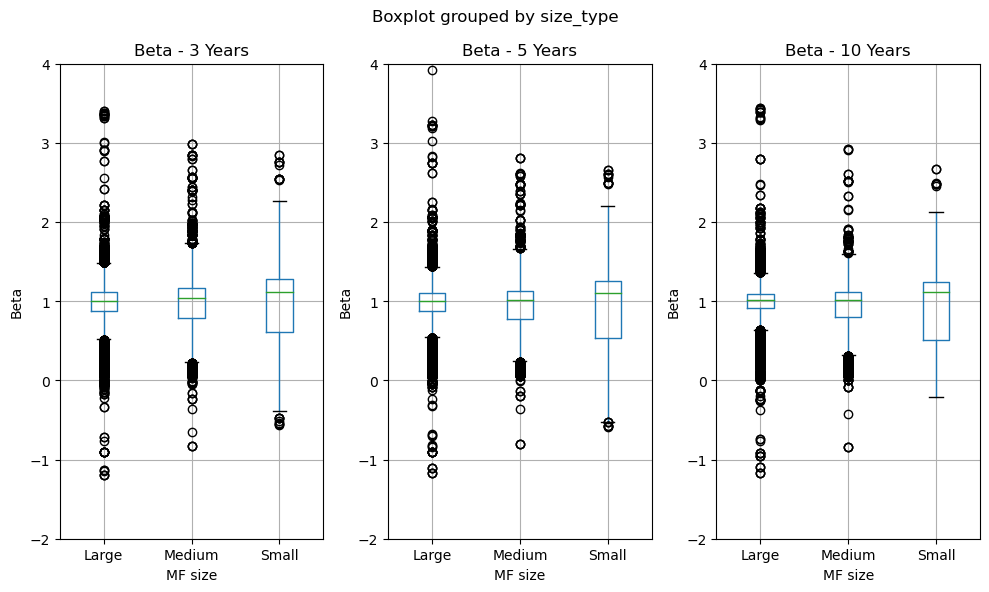

In [9]:
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 6))

# Box plot for fund_beta_3years
df_mutual_funds.boxplot(column='fund_beta_3years', by='size_type', ax=axs[0])
axs[0].set_title('Beta - 3 Years')
axs[0].set_xlabel('MF size')
axs[0].set_ylabel('Beta')
axs[0].set_ylim(-2, 4)  # Set the y-axis limit for the first subplot

# Box plot for fund_beta_5years
df_mutual_funds.boxplot(column='fund_beta_5years', by='size_type', ax=axs[1])
axs[1].set_title('Beta - 5 Years')
axs[1].set_xlabel('MF size')
axs[1].set_ylabel('Beta')
axs[1].set_ylim(-2, 4)  # Set the y-axis limit for the first subplot

# Box plot for fund_beta_10years
df_mutual_funds.boxplot(column='fund_beta_10years', by='size_type', ax=axs[2])
axs[2].set_title('Beta - 10 Years')
axs[2].set_xlabel('MF size')
axs[2].set_ylabel('Beta')
axs[2].set_ylim(-2, 4)  # Set the y-axis limit for the first subplot


# Adjust layout to prevent overlapping titles
plt.tight_layout()

plt.show()

### 3.4 MF SIze and Sharpe Ratio (Benchmark : the higher , the better)

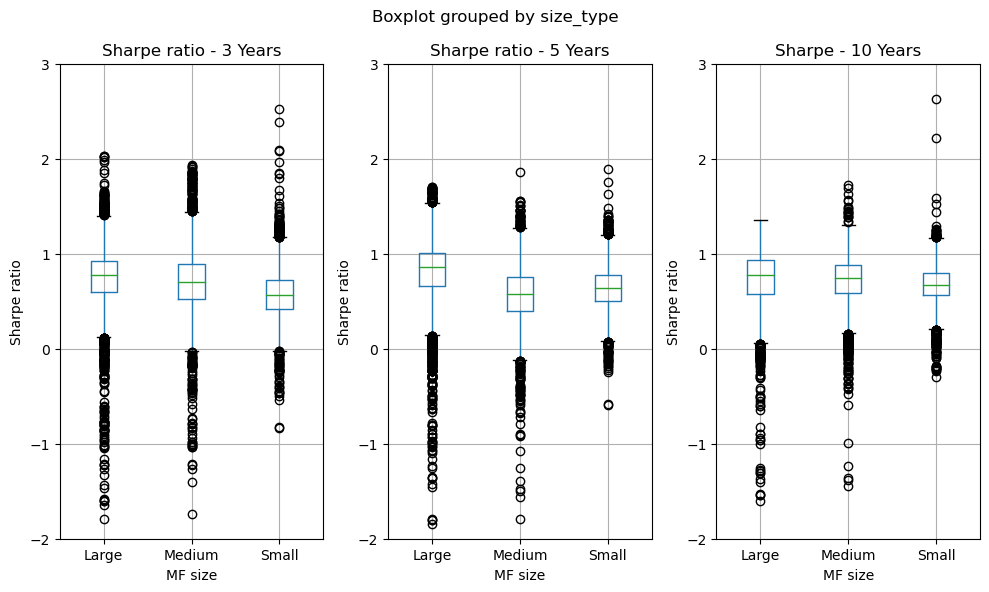

In [16]:
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 6))

# Box plot for fund_beta_3years
df_mutual_funds.boxplot(column='fund_sharpe_ratio_3years', by='size_type', ax=axs[0])
axs[0].set_title('Sharpe ratio - 3 Years')
axs[0].set_xlabel('MF size')
axs[0].set_ylabel('Sharpe ratio')
axs[0].set_ylim(-2, 3)  # Set the y-axis limit for the first subplot

# Box plot for fund_beta_5years
df_mutual_funds.boxplot(column='fund_sharpe_ratio_5years', by='size_type', ax=axs[1])
axs[1].set_title('Sharpe ratio - 5 Years')
axs[1].set_xlabel('MF size')
axs[1].set_ylabel('Sharpe ratio')
axs[1].set_ylim(-2, 3)  # Set the y-axis limit for the first subplot

# Box plot for fund_beta_10years
df_mutual_funds.boxplot(column='fund_sharpe_ratio_10years', by='size_type', ax=axs[2])
axs[2].set_title('Sharpe - 10 Years')
axs[2].set_xlabel('MF size')
axs[2].set_ylabel('Sharpe ratio')
axs[2].set_ylim(-2, 3)  # Set the y-axis limit for the first subplot


# Adjust layout to prevent overlapping titles
plt.tight_layout()

plt.show()

### 3.5 MF size and ESG Risk

<Axes: title={'center': 'esg_score'}, xlabel='size_type'>

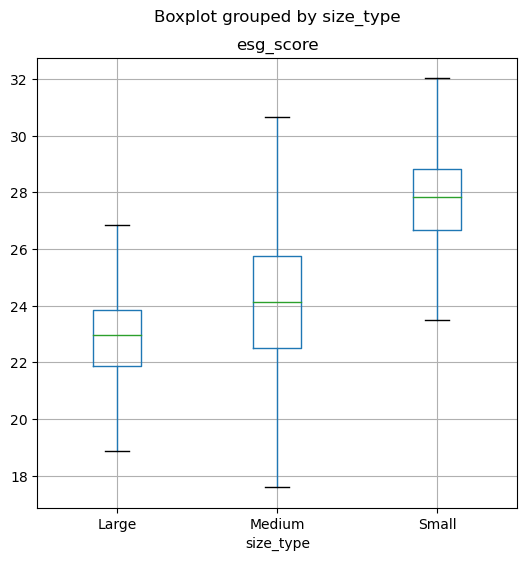

In [13]:
df_mutual_funds.boxplot(column='esg_score',by='size_type', showfliers=False, figsize=(6,6))

## 3 years

<Axes: title={'center': 'fund_mean_annual_return_3years'}, xlabel='size_type'>

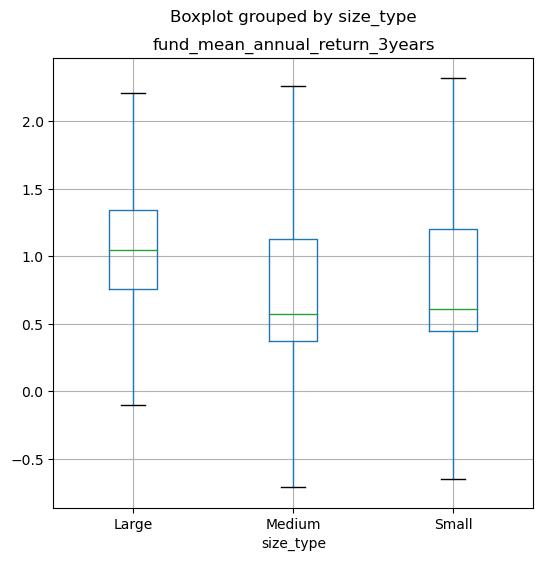

In [29]:
df2_mutual_funds.boxplot(column='fund_mean_annual_return_3years',by='size_type', showfliers=False, figsize=(6,6))

## Fees 

<Axes: title={'center': 'fund_annual_report_net_expense_ratio'}, xlabel='size_type'>

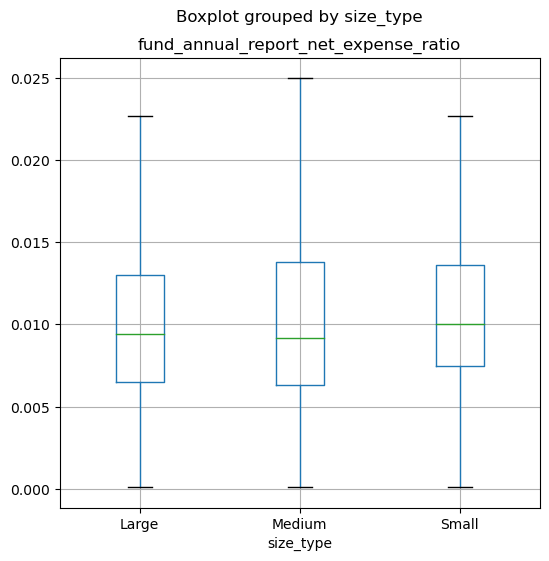

In [41]:
df2_mutual_funds.boxplot(column='fund_annual_report_net_expense_ratio',by='size_type',showfliers=False, figsize=(6,6))


<Axes: title={'center': 'initial_investment'}, xlabel='size_type'>

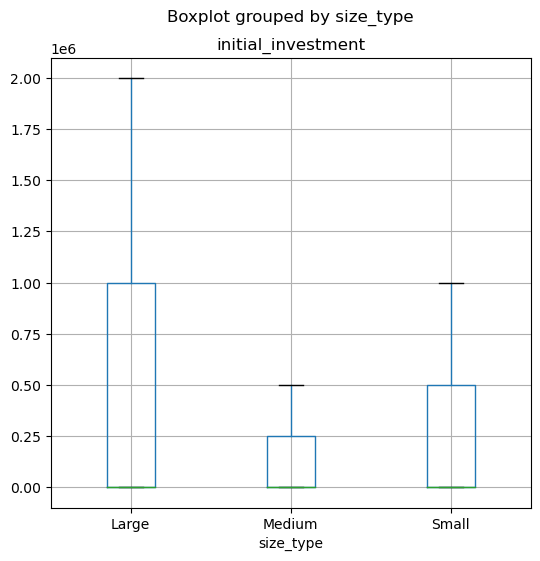

In [42]:
df2_mutual_funds.boxplot(column='initial_investment',by='size_type',showfliers=False, figsize=(6,6))

## 4.Yearly Return per Investment type

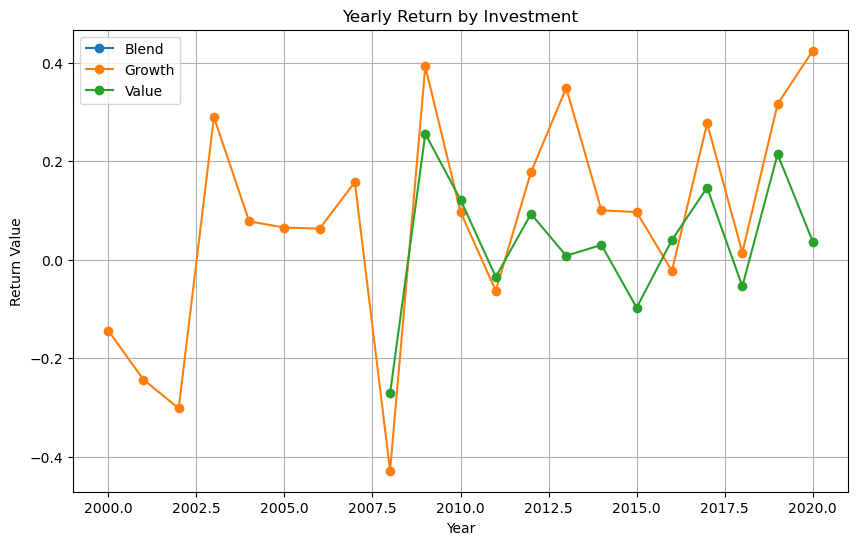

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by Size
grouped_data = df2_mutual_funds.groupby('investment_type')

# Plotting
plt.figure(figsize=(10, 6))

for size_type, group in grouped_data:
    # Limit the number of funds to 20,000
    if len(group) > 23782:
        group = group.head(23782)
        
    years = []
    returns = []
    
    for col in group.columns:
        if col.startswith('fund_return_') and not col.endswith('_q1') and not col.endswith('_q2') and not col.endswith('_q3') and not col.endswith('_q4'):
            try:
                year = int(col.split('_')[2])
                years.append(year)
                returns.append(group[col].values[0])
            except (IndexError, ValueError):
                continue
    
    plt.plot(years, returns, marker='o', label=size_type)

plt.xlabel('Year')
plt.ylabel('Return Value')
plt.title('Yearly Return by Investment')
plt.legend()
plt.grid(True)


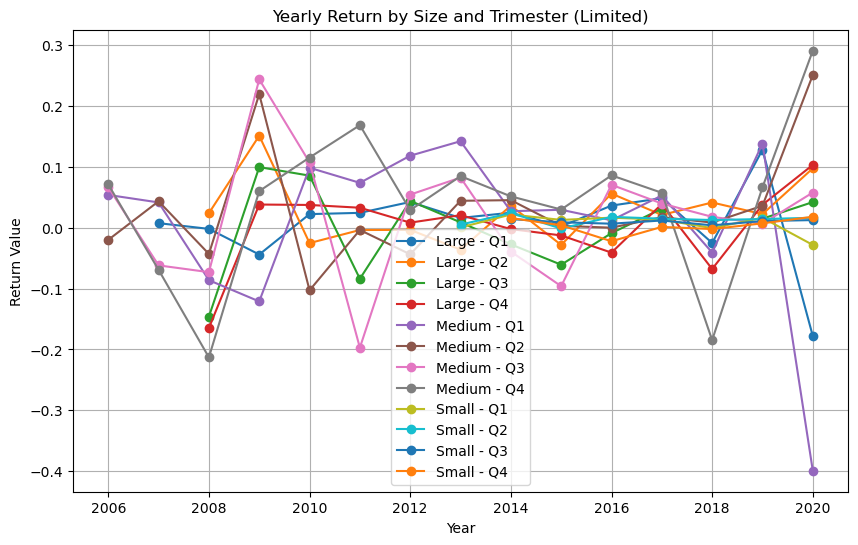

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by Size
grouped_data = df2_mutual_funds.groupby('size_type')

# Plotting
plt.figure(figsize=(10, 6))

# Define the years
years = range(2000, 2021)

for size_type, group in grouped_data:
    # Limit the number of funds to 23000
    if len(group) > 23782:
        group = group.head(23782)
    
    returns_q1 = [group[f'fund_return_{year}_q1'].values[0] if f'fund_return_{year}_q1' in group.columns else None for year in years]
    returns_q2 = [group[f'fund_return_{year}_q2'].values[0] if f'fund_return_{year}_q2' in group.columns else None for year in years]
    returns_q3 = [group[f'fund_return_{year}_q3'].values[0] if f'fund_return_{year}_q3' in group.columns else None for year in years]
    returns_q4 = [group[f'fund_return_{year}_q4'].values[0] if f'fund_return_{year}_q4' in group.columns else None for year in years]
    
    # Remove None values from the lists
    returns_q1 = [r for r in returns_q1 if r is not None]
    returns_q2 = [r for r in returns_q2 if r is not None]
    returns_q3 = [r for r in returns_q3 if r is not None]
    returns_q4 = [r for r in returns_q4 if r is not None]
    
    plt.plot(years[:len(returns_q1)], returns_q1, marker='o', label=size_type + ' - Q1')
    plt.plot(years[:len(returns_q2)], returns_q2, marker='o', label=size_type + ' - Q2')
    plt.plot(years[:len(returns_q3)], returns_q3, marker='o', label=size_type + ' - Q3')
    plt.plot(years[:len(returns_q4)], returns_q4, marker='o', label=size_type + ' - Q4')

plt.xlabel('Year')
plt.ylabel('Return Value')
plt.title('Yearly Return by Size and Trimester (Limited)')
plt.legend()
plt.grid(True)

plt.show()
